<a href="https://colab.research.google.com/github/vokiet2005/TTNT/blob/main/baitaptuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Ma trận kề của đồ thị 6 đỉnh
G = [[ 0, 1, 1, 0, 1, 0],
     [ 1, 0, 1, 1, 0, 1],
     [ 1, 1, 0, 1, 1, 0],
     [ 0, 1, 1, 0, 0, 1],
     [ 1, 0, 1, 0, 0, 1],
     [ 0, 1, 0, 1, 1, 0]]
# Tên các đỉnh của đồ thị.
node = "ABCDEF"
t_={}
for i in range(len(G)):
    t_[node[i]] = i
# Bậc của các đỉnh
degree =[]
for i in range(len(G)):
    degree.append(sum(G[i]))
# Màu có thể sử dụng để tô cho các đỉnh
colorDict = {}
for i in range(len(G)):
    colorDict[node[i]]=["Blue","Red","Yellow","Green"]
# Sắp xếp các đỉnh theo thứ tự bậc
sortedNode=[]
indeks = []
# use selection sort
for i in range(len(degree)):
    _max = 0
    j = 0
    for j in range(len(degree)):
        if j not in indeks:
            if degree[j] > _max:
                _max = degree[j]
                idx = j
    indeks.append(idx)
    sortedNode.append(node[idx])
# Phần xử lý tô màu (sử dụng màu ít nhất có thể)
theSolution={}
for n in sortedNode:
    setTheColor = colorDict[n]
    theSolution[n] = setTheColor[0]
    adjacentNode = G[t_[n]]
    for j in range(len(adjacentNode)):
        if adjacentNode[j]==1 and (setTheColor[0] in colorDict[node[j]]):
            colorDict[node[j]].remove(setTheColor[0])
# In kết quả từng đỉnh và màu đã tô tương ứng
for t,w in sorted(theSolution.items()):
    print("Đỉnh ",t," = ",w)

Đỉnh  A  =  Yellow
Đỉnh  B  =  Blue
Đỉnh  C  =  Red
Đỉnh  D  =  Yellow
Đỉnh  E  =  Blue
Đỉnh  F  =  Red


Tạo file txt cho code ở dưới


In [32]:
# Nội dung ma trận
G = [[ 0, 1, 1, 0, 1, 0],
     [ 1, 0, 1, 1, 0, 1],
     [ 1, 1, 0, 1, 1, 0],
     [ 0, 1, 1, 0, 0, 1],
     [ 1, 0, 1, 0, 0, 1],
     [ 0, 1, 0, 1, 1, 0]]

# Tạo và ghi vào file graph.txt
with open("graph.txt", "w") as f:
    for row in G:
        f.write(' '.join(map(str, row)) + '\n')

print("Đã tạo file graph.txt thành công!")

Đã tạo file graph.txt thành công!


PHẦN 1: KHAI BÁO THƯ VIỆN
Python

import string
import os
import networkx as nx
import matplotlib.pyplot as plt
Giải thích:

import string: Thư viện chuẩn của Python, dùng để lấy chuỗi ký tự "ABC...Z" nhằm đặt tên cho các đỉnh của đồ thị.

import os: Dùng để tương tác với hệ điều hành, cụ thể ở đây là kiểm tra xem file dữ liệu có tồn tại hay không (os.path.exists).

import networkx as nx: Thư viện chuyên dụng để xử lý cấu trúc dữ liệu đồ thị, tính toán vị trí các đỉnh.

import matplotlib.pyplot as plt: Thư viện đồ họa dùng để vẽ hình ảnh đồ thị và hiển thị cửa sổ kết quả lên màn hình.

PHẦN 2: XỬ LÝ DỮ LIỆU ĐẦU VÀO (INPUT)
Hàm 1: Tạo file mẫu
Python

def tao_file_mau_neu_chua_co(ten_file):
    """Tự động tạo file graph.txt nếu chưa tồn tại để test"""
    if not os.path.exists(ten_file):
        noi_dung = """0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0"""
        with open(ten_file, "w") as f:
            f.write(noi_dung)
        print(f"Đã tạo file mẫu '{ten_file}' thành công.\n")
Giải thích:

if not os.path.exists(ten_file): Kiểm tra xem file có tên là ten_file đã có trong thư mục chưa.

with open(ten_file, "w"): Mở file ở chế độ ghi ("w" - write). Nếu chưa có file thì máy sẽ tự tạo mới.

Tác dụng: Giúp chương trình không bị lỗi khi chạy lần đầu tiên nếu người dùng quên tạo file dữ liệu.

Hàm 2: Đọc ma trận từ file
Python

def doc_ma_tran(duong_dan_file):
    """Đọc file txt thành ma trận kề"""
    try:
        with open(duong_dan_file, 'r') as f:
            return [[int(x) for x in line.strip().split()] for line in f if line.strip()]
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {duong_dan_file}")
        return None
Giải thích:

line.strip().split(): Xử lý từng dòng văn bản. strip() cắt bỏ khoảng trắng thừa ở đầu đuôi, split() cắt chuỗi "0 1 0" thành danh sách ["0", "1", "0"].

int(x): Ép kiểu dữ liệu từ chuỗi ký tự sang số nguyên để máy tính có thể cộng trừ nhân chia.

Tác dụng: Biến đổi file văn bản (.txt) thành biến Ma trận kề (List 2 chiều) trong Python để xử lý.

Hàm 3: Khởi tạo thông tin đỉnh và bậc
Python

def khoi_tao_thong_tin(G):
    """Tạo tên đỉnh và tính bậc ban đầu"""
    n = len(G)
    nodes = list(string.ascii_uppercase[:n]) if n <= 26 else [f"V{i}" for i in range(n)]
    t_index = {name: i for i, name in enumerate(nodes)}
    degrees = [sum(row) for row in G]
    return nodes, t_index, degrees
Giải thích:

string.ascii_uppercase[:n]: Lấy n chữ cái đầu tiên (A, B, C...). Nếu đồ thị quá lớn (>26 đỉnh), code tự chuyển sang đặt tên là V0, V1, V2...

t_index: Tạo từ điển ánh xạ tên sang chỉ số (Ví dụ: {'A': 0, 'B': 1}). Giúp truy xuất ma trận nhanh hơn.

sum(row): Tính tổng các số 1 trong một hàng của ma trận. Trong ma trận kề, tổng của hàng chính là Bậc của đỉnh.

PHẦN 3: THUẬT TOÁN TÔ MÀU (PROCESS)
Hàm 4: Sắp xếp đỉnh (Bước 1 Welsh-Powell)
Python

def sap_xep_dinh(nodes, degrees):
    """Sắp xếp đỉnh theo bậc giảm dần (Selection Sort)"""
    degrees_copy = degrees[:]
    sorted_nodes = []
    used_indices = []
    
    n = len(degrees)
    for _ in range(n):
        _max = -1
        idx = -1
        for j in range(n):
            if j not in used_indices:
                if degrees_copy[j] > _max:
                    _max = degrees_copy[j]
                    idx = j
        if idx != -1:
            used_indices.append(idx)
            sorted_nodes.append(nodes[idx])
            
    return sorted_nodes
Giải thích:

Đây là thuật toán Selection Sort (Sắp xếp chọn).

Mục tiêu: Tìm đỉnh có bậc lớn nhất (_max) chưa được chọn, đưa nó vào danh sách sorted_nodes.

Tại sao cần hàm này? Thuật toán tô màu yêu cầu ưu tiên tô các đỉnh có bậc cao trước (những đỉnh "khó tính" nhất, nối với nhiều đỉnh khác nhất).

Hàm 5: Tô màu tham lam (Bước 2 Welsh-Powell)
Python

def thuat_toan_to_mau(G, sorted_nodes, t_index, all_nodes):
    """Tô màu và trả về kết quả"""
    n = len(G)
    colors_pool = range(1, n + 1) # Tạo kho màu 1, 2, 3...
    
    color_dict = {node: list(colors_pool) for node in all_nodes}
    solution = {}

    for node in sorted_nodes:
        if not color_dict[node]:
            solution[node] = 0 # Trường hợp lỗi (hết màu)
            continue
            
        # 1. CHỌN MÀU: Lấy màu nhỏ nhất còn lại trong danh sách
        assigned = color_dict[node][0]
        solution[node] = assigned
        
        # 2. LAN TRUYỀN RÀNG BUỘC: Xóa màu này khỏi các đỉnh kề
        u_idx = t_index[node]
        for v_idx, val in enumerate(G[u_idx]):
            if val == 1: # Nếu có nối cạnh
                v_name = all_nodes[v_idx]
                if assigned in color_dict[v_name]:
                    color_dict[v_name].remove(assigned)
    return solution
Giải thích:

color_dict: Ban đầu, mỗi đỉnh đều có danh sách đầy đủ các màu có thể tô [1, 2, 3, 4...].

color_dict[v_name].remove(assigned): Đây là dòng quan trọng nhất. Ngay khi đỉnh A chọn màu 1, code sẽ tìm tất cả hàng xóm của A và xóa màu 1 khỏi danh sách của họ.

Kết quả: Đảm bảo không bao giờ có 2 đỉnh kề nhau cùng màu.

Hàm 6: Tính quá trình hạ bậc (Yêu cầu bài tập)
Python

def tinh_ha_bac(G, solution, all_nodes):
    n = len(G)
    history = []
    removed_nodes = set()
    used_colors = sorted(list(set(solution.values())))
    
    for color in used_colors:
        # Tìm các đỉnh vừa tô xong màu này để loại bỏ
        current_layer_nodes = [n for n, c in solution.items() if c == color]
        removed_nodes.update(current_layer_nodes)
        
        # Tính lại bậc của đồ thị sau khi loại bỏ đỉnh
        current_degrees = []
        for i in range(n):
            if all_nodes[i] in removed_nodes:
                current_degrees.append(0) # Đỉnh đã xóa thì bậc về 0
            else:
                d = 0
                for j in range(n):
                    # Chỉ đếm cạnh nối với đỉnh CHƯA xóa
                    if G[i][j] == 1 and all_nodes[j] not in removed_nodes:
                        d += 1
                current_degrees.append(d)
        history.append(current_degrees)  
    return history
Giải thích:

Hàm này mô phỏng lại quá trình: "Tô xong màu 1 -> Xóa các đỉnh màu 1 -> Tính lại bậc các đỉnh còn lại -> Tô màu 2...".

Kết quả trả về (history) là một danh sách các bậc giảm dần theo từng bước, dùng để in ra bảng kết quả chi tiết.

PHẦN 4: HIỂN THỊ KẾT QUẢ (OUTPUT)
Hàm 7: In bảng kết quả dạng Text
Python

def in_bang_ket_qua(G, solution, all_nodes, degrees, t_index, history):
    # (Phần code định dạng in ấn sử dụng f-string)
    display_nodes = sorted(all_nodes)
    # ... (Các lệnh print kẻ bảng) ...
    print_row("MÀU TÔ", colors)
    # ...
Giải thích:

Hàm này chủ yếu sử dụng kỹ thuật format string (ví dụ f"{val:^10}") để căn lề văn bản, tạo ra các cột thẳng hàng trong cửa sổ console. Nó không tham gia tính toán logic mà chỉ làm đẹp kết quả hiển thị.

Hàm 8: Vẽ đồ thị có màu (Visual) - Quan trọng
Python

def ve_do_thi_to_mau(G, solution, all_nodes):
    """Vẽ đồ thị với màu sắc tương ứng"""
    
    # 1. Bảng màu quy đổi: Số -> Tên màu tiếng Anh
    color_palette = {1: 'red', 2: 'blue', 3: 'yellow', 4: 'green', 5: 'orange', 6: 'purple'}

    # 2. Tạo đối tượng đồ thị
    G_viz = nx.Graph()
    G_viz.add_nodes_from(all_nodes)
    
    # 3. Thêm cạnh dựa trên ma trận kề
    n = len(G)
    for i in range(n):
        for j in range(i + 1, n):
            if G[i][j] == 1:
                G_viz.add_edge(all_nodes[i], all_nodes[j])
    
    # 4. Ánh xạ kết quả (số 1,2..) thành màu (red, blue..)
    node_colors = []
    for node in G_viz.nodes():
        color_code = solution.get(node, 0)
        c = color_palette.get(color_code, 'white')
        node_colors.append(c)

    # 5. Vẽ hình
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G_viz, seed=42) # Thuật toán bố trí đỉnh đẹp mắt
    
    nx.draw_networkx_nodes(G_viz, pos, node_color=node_colors, node_size=1000, edgecolors='black')
    nx.draw_networkx_labels(G_viz, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G_viz, pos, width=2)
    
    plt.show()
Giải thích:

nx.Graph(): Khởi tạo một đồ thị rỗng trong bộ nhớ máy tính.

G_viz.add_edge: Duyệt ma trận kề, chỗ nào là số 1 thì vẽ dây nối giữa 2 đỉnh.

node_colors: Tạo ra một danh sách màu theo đúng thứ tự các đỉnh để máy tính biết đỉnh A tô gì, đỉnh B tô gì.

nx.spring_layout: Tính toán tọa độ X, Y cho các đỉnh sao cho chúng bung ra, không bị đè lên nhau (mô phỏng lực lò xo).

plt.show(): Lệnh cuối cùng để bật cửa sổ hình ảnh lên.

PHẦN 5: CHƯƠNG TRÌNH CHÍNH (MAIN)
Python

def main():
    ten_file = "graph.txt"
    tao_file_mau_neu_chua_co(ten_file)
    
    # Cho phép người dùng nhập tên file khác
    inp = input(f"Nhập tên file (nhấn Enter để dùng '{ten_file}'): ")
    if inp.strip():
        ten_file = inp
        
    G = doc_ma_tran(ten_file)
    if G:
        # Gọi lần lượt các hàm theo thứ tự Logic
        nodes, t_index, degrees = khoi_tao_thong_tin(G)
        sorted_nodes = sap_xep_dinh(nodes, degrees)
        solution = thuat_toan_to_mau(G, sorted_nodes, t_index, nodes)
        history = tinh_ha_bac(G, solution, nodes)
        
        # In kết quả
        in_bang_ket_qua(G, solution, nodes, degrees, t_index, history)
        
        # Vẽ hình
        ve_do_thi_to_mau(G, solution, nodes)

if __name__ == "__main__":
    main()
Giải thích:

Đây là hàm điều phối trung tâm. Nó gọi các hàm con theo trình tự: Tạo file -> Đọc file -> Tính toán -> In bảng -> Vẽ hình.

if __name__ == "__main__":: Dòng này đảm bảo code chỉ chạy khi bạn trực tiếp thực thi file này (tránh lỗi khi import vào dự án khác).

Nhập tên file (nhấn Enter để dùng 'graph.txt'): graph.txt

BẢNG KẾT QUẢ TÔ MÀU VÀ HẠ BẬC:
---------------------------------------------------------------------------------
|     ĐỈNH     |    A     |    B     |    C     |    D     |    E     |    F     |
---------------------------------------------------------------------------------
|    MÀU TÔ    |    3     |    1     |    2     |    3     |    1     |    2     |
---------------------------------------------------------------------------------
|   BẬC GỐC    |    3     |    4     |    4     |    3     |    3     |    3     |
---------------------------------------------------------------------------------
|  MÀU CẤM TÔ  |   1,2    |   2,3    |   1,3    |   1,2    |   2,3    |   1,3    |
---------------------------------------------------------------------------------
|   HẠ BẬC 1   |    1     |    0     |    2     |    2     |    0     |    1     |
---------------------------------------------------------------------------------
|  

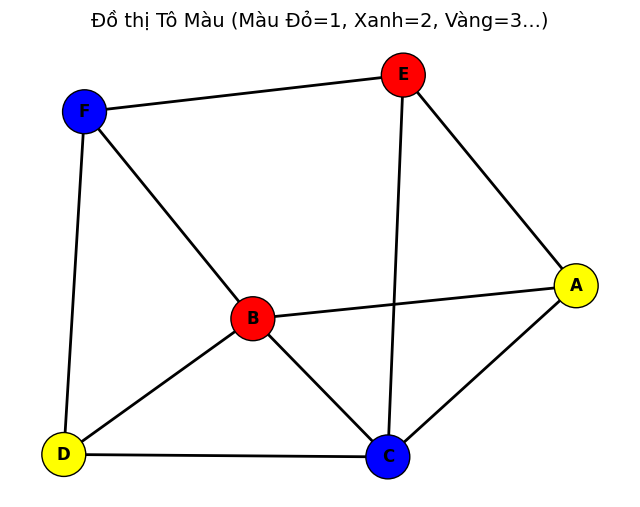

In [41]:
import string
import os
# --- THÊM THƯ VIỆN ĐỂ VẼ HÌNH ---
import networkx as nx
import matplotlib.pyplot as plt

# --- PHẦN 1: CÁC HÀM XỬ LÝ LOGIC (GIỮ NGUYÊN) ---

def tao_file_mau_neu_chua_co(ten_file):
    """Tự động tạo file graph.txt nếu chưa tồn tại để test"""
    if not os.path.exists(ten_file):
        noi_dung = """0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0"""
        with open(ten_file, "w") as f:
            f.write(noi_dung)
        print(f"Đã tạo file mẫu '{ten_file}' thành công.\n")

def doc_ma_tran(duong_dan_file):
    """Đọc file txt thành ma trận kề"""
    try:
        with open(duong_dan_file, 'r') as f:
            return [[int(x) for x in line.strip().split()] for line in f if line.strip()]
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {duong_dan_file}")
        return None

def khoi_tao_thong_tin(G):
    """Tạo tên đỉnh và tính bậc ban đầu"""
    n = len(G)
    nodes = list(string.ascii_uppercase[:n]) if n <= 26 else [f"V{i}" for i in range(n)]
    t_index = {name: i for i, name in enumerate(nodes)}
    degrees = [sum(row) for row in G]
    return nodes, t_index, degrees

def sap_xep_dinh(nodes, degrees):
    """Sắp xếp đỉnh theo bậc giảm dần (Selection Sort)"""

    degrees_copy = degrees[:]
    sorted_nodes = []
    used_indices = []

    n = len(degrees)
    for _ in range(n):
        _max = -1
        idx = -1
        for j in range(n):
            if j not in used_indices:
                if degrees_copy[j] > _max:
                    _max = degrees_copy[j]
                    idx = j
        if idx != -1:
            used_indices.append(idx)
            sorted_nodes.append(nodes[idx])

    return sorted_nodes

def thuat_toan_to_mau(G, sorted_nodes, t_index, all_nodes):
    """Tô màu (Welsh-Powell) và trả về kết quả"""
    n = len(G)
    # Tạo kho màu dạng số: 1, 2, 3, 4...
    colors_pool = range(1, n + 1)

    color_dict = {node: list(colors_pool) for node in all_nodes}
    solution = {}

    for node in sorted_nodes:
        if not color_dict[node]:
            solution[node] = 0
            continue

        # Chọn màu nhỏ nhất khả dụng
        assigned = color_dict[node][0]
        solution[node] = assigned

        # Xóa màu này khỏi danh sách màu của các đỉnh kề
        u_idx = t_index[node]
        for v_idx, val in enumerate(G[u_idx]):
            if val == 1:
                v_name = all_nodes[v_idx]
                if assigned in color_dict[v_name]:
                    color_dict[v_name].remove(assigned)
    return solution

def tinh_ha_bac(G, solution, all_nodes):
    """Tính lịch sử hạ bậc sau mỗi lượt tô màu"""
    n = len(G)
    history = []
    removed_nodes = set()

    # Lấy danh sách các màu đã dùng theo thứ tự 1, 2, 3...
    used_colors = sorted(list(set(solution.values())))

    for color in used_colors:
        # Xác định các đỉnh vừa được tô màu này (sẽ bị loại bỏ)
        current_layer_nodes = [n for n, c in solution.items() if c == color]
        removed_nodes.update(current_layer_nodes)

        # Tính lại bậc của toàn bộ đồ thị
        current_degrees = []
        for i in range(n):
            u_name = all_nodes[i]
            if u_name in removed_nodes:
                current_degrees.append(0) # Đã xóa thì bậc = 0
            else:
                d = 0
                for j in range(n):
                    # Chỉ đếm cạnh nối với các đỉnh CHƯA bị xóa
                    if G[i][j] == 1 and all_nodes[j] not in removed_nodes:
                        d += 1
                current_degrees.append(d)
        history.append(current_degrees)

        # Nếu tất cả đã về 0 thì dừng
        if all(x == 0 for x in current_degrees):
            break

    return history

# --- PHẦN 2: IN ẤN HIỂN THỊ (GIỮ NGUYÊN) ---

def in_bang_ket_qua(G, solution, all_nodes, degrees, t_index, history):
    # Sắp xếp hiển thị theo tên A, B, C...
    display_nodes = sorted(all_nodes)

    # Cấu hình độ rộng cột
    col_w = 10
    header_w = 14
    line_len = header_w + (col_w + 1) * len(display_nodes) + 1

    def print_line():
        print("-" * line_len)

    def print_row(title, values):
        print(f"|{title:^{header_w}}|", end="")
        for v in values:
            print(f"{str(v):^{col_w}}|", end="")
        print()
        print_line()

    print("\nBẢNG KẾT QUẢ TÔ MÀU VÀ HẠ BẬC:")
    print_line()

    # 1. Tên Đỉnh
    print(f"|{'ĐỈNH':^{header_w}}|", end="")
    for n in display_nodes:
        print(f"{n:^{col_w}}|", end="")
    print()
    print_line()

    # 2. Màu Tô
    colors = [solution[n] for n in display_nodes]
    print_row("MÀU TÔ", colors)

    # 3. Bậc Gốc
    orig_degrees = [degrees[t_index[n]] for n in display_nodes]
    print_row("BẬC GỐC", orig_degrees)

    # 4. Màu Cấm Tô (Liệt kê màu các đỉnh kề)
    forbidden_list = []
    for n in display_nodes:
        u_idx = t_index[n]
        neigh_colors = set()
        for v_idx, val in enumerate(G[u_idx]):
            if val == 1:
                v_name = all_nodes[v_idx]
                if v_name in solution:
                    neigh_colors.add(solution[v_name])
        # Chuyển set thành chuỗi "1,3"
        s = ",".join(map(str, sorted(neigh_colors)))
        forbidden_list.append(s if s else "-")
    print_row("MÀU CẤM TÔ", forbidden_list)

    # 5. Quá trình Hạ Bậc
    for i, deg_list in enumerate(history):
        # Cần map đúng vị trí đỉnh A, B, C...
        ordered_deg = []
        for n in display_nodes:
            idx = t_index[n]
            ordered_deg.append(deg_list[idx])
        print_row(f"HẠ BẬC {i+1}", ordered_deg)

# --- PHẦN MỚI THÊM: VẼ HÌNH ---

def ve_do_thi_to_mau(G, solution, all_nodes):
    """Vẽ đồ thị với màu sắc tương ứng các con số 1, 2, 3..."""
    print("\nĐang hiển thị hình ảnh đồ thị...")

    # 1. Bảng màu tương ứng với các số 1, 2, 3, 4...
    color_palette = {
        1: 'red',       # Số 1 -> Màu Đỏ
        2: 'blue',      # Số 2 -> Màu Xanh dương
        3: 'yellow',    # Số 3 -> Màu Vàng
        4: 'green',     # Số 4 -> Màu Xanh lá
        5: 'orange',    # Số 5 -> Màu Cam
        6: 'purple',    # Số 6 -> Màu Tím
        7: 'cyan',      # Số 7 -> Màu Xanh lơ
        0: 'grey'       # Màu xám nếu lỗi
    }

    # 2. Tạo đồ thị NetworkX
    G_viz = nx.Graph()
    G_viz.add_nodes_from(all_nodes)

    n = len(G)
    for i in range(n):
        for j in range(i + 1, n):
            if G[i][j] == 1:
                G_viz.add_edge(all_nodes[i], all_nodes[j])

    # 3. Ánh xạ màu từ solution vào đồ thị
    node_colors = []
    for node in G_viz.nodes():
        color_code = solution.get(node, 0)
        # Lấy màu từ bảng màu, nếu số lớn hơn 7 thì mặc định là trắng
        c = color_palette.get(color_code, 'white')
        node_colors.append(c)

    # 4. Vẽ
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G_viz, seed=42) # Bố cục lò xo

    nx.draw_networkx_nodes(G_viz, pos, node_color=node_colors, node_size=1000, edgecolors='black')
    nx.draw_networkx_labels(G_viz, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G_viz, pos, width=2)

    plt.title("Đồ thị Tô Màu (Màu Đỏ=1, Xanh=2, Vàng=3...)", fontsize=14)
    plt.axis('off')
    plt.show()

# --- PHẦN 3: MAIN ---

def main():
    ten_file = "graph.txt"
    tao_file_mau_neu_chua_co(ten_file)

    # Nhập tên file (hoặc Enter để dùng mặc định)
    inp = input(f"Nhập tên file (nhấn Enter để dùng '{ten_file}'): ")
    if inp.strip():
        ten_file = inp

    G = doc_ma_tran(ten_file)
    if G:
        nodes, t_index, degrees = khoi_tao_thong_tin(G)
        sorted_nodes = sap_xep_dinh(nodes, degrees)
        solution = thuat_toan_to_mau(G, sorted_nodes, t_index, nodes)
        history = tinh_ha_bac(G, solution, nodes)

        in_bang_ket_qua(G, solution, nodes, degrees, t_index, history)

        # --- GỌI HÀM VẼ HÌNH MỚI THÊM Ở ĐÂY ---
        ve_do_thi_to_mau(G, solution, nodes)

if __name__ == "__main__":
    main()

In [36]:
# Nội dung ma trận
T= [[0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]]

# Tạo và ghi vào file chi_phi.txt
with open("chi_phi.txt", "w") as f:
    for row in T:
        f.write(' '.join(map(str, row)) + '\n')

print("Đã tạo file chi_phi.txt thành công!")

Đã tạo file chi_phi.txt thành công!


PHẦN 1: KHAI BÁO THƯ VIỆN VÀ ĐỌC DỮ LIỆU
Python

import sys
import string
import os

# --- 1. KHỐI ĐỌC DỮ LIỆU ---
def doc_ma_tran(duong_dan_file):
    try:
        with open(duong_dan_file, 'r') as f:
            return [[int(x) for x in line.strip().split()] for line in f if line.strip()]
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {duong_dan_file}")
        return None

def tao_ten_thanh_pho(n):
    if n <= 26:
        return list(string.ascii_uppercase[:n])
    return [f"City_{i}" for i in range(n)]
Giải thích:

import sys: Thư viện hệ thống, ở đây chủ yếu dùng sys.maxsize để lấy một số cực lớn (tượng trưng cho dương vô cùng).

doc_ma_tran(...): Hàm này đọc ma trận trọng số (khoảng cách giữa các thành phố) từ file text.

[int(x) ... split()]: Chuyển đổi chuỗi số trong file thành danh sách số nguyên 2 chiều (Ma trận kề).

tao_ten_thanh_pho(n): Tự động đặt tên cho các thành phố. Nếu ít hơn 26 thành phố thì đặt là A, B, C... Nếu nhiều hơn thì đặt là City_0, City_1...

PHẦN 2: KHỞI TẠO LỚP GIẢI THUẬT (INIT)
Python

class TSPSolver:
    def __init__(self, graph):
        self.graph = graph
        self.n = len(graph)
        self.visited = [False] * self.n
        self.best_cost = sys.maxsize # Khởi tạo chi phí tối ưu là vô cùng lớn
        self.best_path = []          # Lưu lộ trình tốt nhất
        
        # Bắt đầu từ thành phố 0 (A)
        self.visited[0] = True
        self.start_node = 0
Giải thích:

Đây là hàm khởi tạo (Constructor) khi bạn tạo một đối tượng giải bài toán.

self.visited: Một danh sách [False, False, ...] để đánh dấu xem thành phố nào đã đi qua rồi. Điều này cực kỳ quan trọng để tránh đi lặp lại một thành phố.

self.best_cost = sys.maxsize: Ban đầu ta chưa biết đường nào ngắn nhất, nên ta giả sử kỷ lục hiện tại là một số cực lớn (vô cùng). Mục tiêu của thuật toán là tìm con số nhỏ hơn số này để cập nhật.

self.visited[0] = True: Mặc định luôn bắt đầu đi từ thành phố đầu tiên (index 0).

PHẦN 3: THUẬT TOÁN QUAY LUI & CẮT TỈA (CORE LOGIC)
Python

    def tim_duong(self, current_city, count, current_cost, path):
        # --- ĐIỀU KIỆN CẮT TỈA (BRANCH AND BOUND) ---
        # Nếu chi phí đang đi lớn hơn chi phí tốt nhất đã tìm thấy -> Dừng luôn nhánh này
        if current_cost >= self.best_cost:
            return

        # --- TRƯỜNG HỢP CƠ SỞ (BASE CASE) ---
        # Nếu đã đi qua tất cả các thành phố
        if count == self.n:
            # Kiểm tra xem có đường quay về điểm xuất phát không
            dist_to_start = self.graph[current_city][self.start_node]
            if dist_to_start > 0:
                total_cost = current_cost + dist_to_start
                # Nếu tìm được đường ngắn hơn kỷ lục cũ -> Cập nhật
                if total_cost < self.best_cost:
                    self.best_cost = total_cost
                    self.best_path = path + [self.start_node]
            return

        # --- QUAY LUI (BACKTRACKING) ---
        # Thử đi đến các thành phố tiếp theo
        for next_city in range(self.n):
            # Nếu chưa thăm VÀ có đường đi (chi phí > 0)
            if not self.visited[next_city] and self.graph[current_city][next_city] > 0:
                
                # 1. Đánh dấu đã đi
                self.visited[next_city] = True
                
                # 2. Đệ quy đi tiếp
                self.tim_duong(next_city, count + 1,
                               current_cost + self.graph[current_city][next_city],
                               path + [next_city])
                
                # 3. Trả lại trạng thái (Backtrack) để thử đường khác
                self.visited[next_city] = False
Giải thích: Đây là phần quan trọng nhất:

Cắt tỉa (Branch and Bound): Dòng if current_cost >= self.best_cost. Nếu bạn đang đi dở dang mà thấy tốn tiền (chi phí) hơn cả một lộ trình hoàn chỉnh đã tìm thấy trước đó, thì dừng ngay lập tức, không đi tiếp hướng này nữa. Đây là bí quyết giúp thuật toán chạy nhanh hơn vét cạn thông thường.

Trường hợp cơ sở (Base Case): Khi count == self.n nghĩa là đã đi qua đủ tất cả thành phố. Lúc này ta kiểm tra xem từ điểm cuối có đường quay về điểm đầu hay không. Nếu có và tổng chi phí nhỏ hơn kỷ lục cũ (best_cost), ta lưu lại kỷ lục mới.

Quay lui (Backtracking):

Vòng lặp for: Thử đi tất cả các thành phố chưa thăm.

visited[...] = True: Đánh dấu là "đang bận" ở thành phố này.

tim_duong(...): Gọi đệ quy để đi tiếp bước sau.

visited[...] = False: Quan trọng nhất của quay lui. Sau khi đi thử xong hướng đó, ta phải bỏ đánh dấu để vòng lặp sau có thể thử đi lại thành phố này theo một con đường khác.

PHẦN 4: HÀM KHỞI CHẠY (SOLVE)
Python

    def solve(self):
        # Bắt đầu thuật toán: (Thành phố hiện tại, Số lượng đã thăm, Chi phí hiện tại, Lộ trình)
        self.tim_duong(self.start_node, 1, 0, [self.start_node])
        return self.best_cost, self.best_path
Giải thích:

Hàm này đơn giản là kích hoạt thuật toán đệ quy ở trên.

Nó bắt đầu từ start_node (0), số lượng thành phố đã thăm là 1, chi phí ban đầu là 0.

PHẦN 5: CHƯƠNG TRÌNH CHÍNH (MAIN) & HIỂN THỊ
Python

def main():
    # Tạo file mẫu nếu chưa có
    ten_file = "chi_phi.txt"
    if not os.path.exists(ten_file):
        with open(ten_file, "w") as f:
            f.write("0 10 15 20\n10 0 35 25\n15 35 0 30\n20 25 30 0")
            print("Đã tạo file mẫu chi_phi.txt")

    # Nhập tên file
    inp = input(f"Nhập tên file ma trận trọng số (Enter dùng '{ten_file}'): ")
    if inp.strip(): ten_file = inp

    graph = doc_ma_tran(ten_file)
    
    if graph:
        print("\n--- ĐANG TÌM KIẾM LỘ TRÌNH TỐI ƯU... ---")
        names = tao_ten_thanh_pho(len(graph))
        
        solver = TSPSolver(graph)
        cost, path_indices = solver.solve()

        if cost < sys.maxsize:
            # Chuyển đổi index (0, 1, 2) thành tên (A, B, C)
            path_names = [names[i] for i in path_indices]
            path_str = " -> ".join(path_names)
            
            print("-" * 50)
            print(f"Lộ trình tối ưu: {path_str}")
            print(f"Tổng chi phí:    {cost}")
            print("-" * 50)
            
            # Giải thích chi tiết từng chặng
            print("\nChi tiết lộ trình:")
            for i in range(len(path_indices) - 1):
                u, v = path_indices[i], path_indices[i+1]
                w = graph[u][v]
                print(f"  {names[u]} -> {names[v]}: {w}")
        else:
            print("Không tìm được chu trình kín đi qua tất cả thành phố.")

if __name__ == "__main__":
    main()
Giải thích:

Tự tạo dữ liệu: Nếu máy bạn chưa có file chi_phi.txt, code sẽ tự tạo một file mẫu 4 thành phố.

Khởi tạo Solver: Tạo đối tượng TSPSolver và gọi hàm solve().

Xử lý kết quả:

Kết quả trả về là một danh sách các chỉ số (ví dụ: [0, 1, 3, 2, 0]).

Đoạn code dùng List Comprehension [names[i] ...] để biến các số 0, 1, 2 thành tên A, B, C cho dễ đọc.

Vòng lặp cuối cùng in ra chi tiết quãng đường đi từ thành phố này sang thành phố kia tốn bao nhiêu chi phí để người dùng tiện kiểm tra lại.

In [37]:
import sys
import string
import os

# --- 1. KHỐI ĐỌC DỮ LIỆU ---
def doc_ma_tran(duong_dan_file):
    try:
        with open(duong_dan_file, 'r') as f:
            return [[int(x) for x in line.strip().split()] for line in f if line.strip()]
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {duong_dan_file}")
        return None

def tao_ten_thanh_pho(n):
    if n <= 26:
        return list(string.ascii_uppercase[:n])
    return [f"City_{i}" for i in range(n)]

# --- 2. THUẬT TOÁN TSP (QUAY LUI & NHÁNH CẬN) ---
class TSPSolver:
    def __init__(self, graph):
        self.graph = graph
        self.n = len(graph)
        self.visited = [False] * self.n
        self.best_cost = sys.maxsize # Khởi tạo chi phí tối ưu là vô cùng lớn
        self.best_path = []          # Lưu lộ trình tốt nhất

        # Bắt đầu từ thành phố 0 (A)
        self.visited[0] = True
        self.start_node = 0

    def tim_duong(self, current_city, count, current_cost, path):
        # --- ĐIỀU KIỆN CẮT TỈA (BRANCH AND BOUND) ---
        # Nếu chi phí đang đi lớn hơn chi phí tốt nhất đã tìm thấy -> Dừng luôn nhánh này
        if current_cost >= self.best_cost:
            return

        # --- TRƯỜNG HỢP CƠ SỞ (BASE CASE) ---
        # Nếu đã đi qua tất cả các thành phố
        if count == self.n:
            # Kiểm tra xem có đường quay về điểm xuất phát không
            dist_to_start = self.graph[current_city][self.start_node]
            if dist_to_start > 0:
                total_cost = current_cost + dist_to_start
                # Nếu tìm được đường ngắn hơn kỷ lục cũ -> Cập nhật
                if total_cost < self.best_cost:
                    self.best_cost = total_cost
                    self.best_path = path + [self.start_node]
            return

        # --- QUAY LUI (BACKTRACKING) ---
        # Thử đi đến các thành phố tiếp theo
        for next_city in range(self.n):
            # Nếu chưa thăm VÀ có đường đi (chi phí > 0)
            if not self.visited[next_city] and self.graph[current_city][next_city] > 0:

                # 1. Đánh dấu đã đi
                self.visited[next_city] = True

                # 2. Đệ quy đi tiếp
                self.tim_duong(next_city, count + 1,
                               current_cost + self.graph[current_city][next_city],
                               path + [next_city])

                # 3. Trả lại trạng thái (Backtrack) để thử đường khác
                self.visited[next_city] = False

    def solve(self):
        # Bắt đầu thuật toán: (Thành phố hiện tại, Số lượng đã thăm, Chi phí hiện tại, Lộ trình)
        self.tim_duong(self.start_node, 1, 0, [self.start_node])
        return self.best_cost, self.best_path

# --- 3. HIỂN THỊ KẾT QUẢ ---
def main():
    # Tạo file mẫu nếu chưa có
    ten_file = "chi_phi.txt"
    if not os.path.exists(ten_file):
        with open(ten_file, "w") as f:
            f.write("0 10 15 20\n10 0 35 25\n15 35 0 30\n20 25 30 0")
            print("Đã tạo file mẫu chi_phi.txt")

    # Nhập tên file
    inp = input(f"Nhập tên file ma trận trọng số (Enter dùng '{ten_file}'): ")
    if inp.strip(): ten_file = inp

    graph = doc_ma_tran(ten_file)

    if graph:
        print("\n--- ĐANG TÌM KIẾM LỘ TRÌNH TỐI ƯU... ---")
        names = tao_ten_thanh_pho(len(graph))

        solver = TSPSolver(graph)
        cost, path_indices = solver.solve()

        if cost < sys.maxsize:
            # Chuyển đổi index (0, 1, 2) thành tên (A, B, C)
            path_names = [names[i] for i in path_indices]
            path_str = " -> ".join(path_names)

            print("-" * 50)
            print(f"Lộ trình tối ưu: {path_str}")
            print(f"Tổng chi phí:    {cost}")
            print("-" * 50)

            # Giải thích chi tiết
            print("\nChi tiết lộ trình:")
            for i in range(len(path_indices) - 1):
                u, v = path_indices[i], path_indices[i+1]
                w = graph[u][v]
                print(f"  {names[u]} -> {names[v]}: {w}")
        else:
            print("Không tìm được chu trình kín đi qua tất cả thành phố.")

if __name__ == "__main__":
    main()

Nhập tên file ma trận trọng số (Enter dùng 'chi_phi.txt'): chi_phi.txt

--- ĐANG TÌM KIẾM LỘ TRÌNH TỐI ƯU... ---
--------------------------------------------------
Lộ trình tối ưu: A -> B -> D -> C -> A
Tổng chi phí:    80
--------------------------------------------------

Chi tiết lộ trình:
  A -> B: 10
  B -> D: 25
  D -> C: 30
  C -> A: 15
